In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import seaborn as sns

from itertools import product

import sys
sys.path.append('../')
from src.config import ALL_REPRESENTATIONS
from src.condition import Condition, InvalidConditionException
from helpers import cm2inch, title

import warnings
warnings.filterwarnings("ignore", category=Warning)

In [4]:
def show_distance_distributions(
    dataset='clustered',
    representations = ALL_REPRESENTATIONS,
    metrics = ['eucl', 'umap'],
    axs = None,
    ylabels=True,
):
    nrows = len(representations)
    ncols = len(metrics)
    if axs is None:
        fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*1, nrows*.5))
    assert axs.shape == (nrows, ncols)

    for i, j in product(range(nrows), range(ncols)):
        ax=axs[i, j]
        try:
            condition = Condition(dataset, representations[i], metrics[j])
            _, color = condition.show_distance_distribution(ax=ax, 
                as_kde = True, 
                shade=True, 
                lw=0.5, 
                alpha=1,
                edgecolor='w',
                common_norm=True,
                annot=False, 
                text_kws=dict(xy=(.5, .5), ha='center'),
                uni_fmt='{}',
                multi_fmt='{}',
            )
            ax.spines['bottom'].set_color(color)
        except InvalidConditionException:
            sns.despine(ax=ax, left=True)
            ax.set_yticks([])
            ax.annotate('NA', 
                xy=(0.5, 0.3), xycoords="axes fraction",
                ha='center', va='center', color='0.7',
                fontsize=7)
            ax.spines['bottom'].set_color('0.7')

    for ax in axs.ravel():
        ax.set_xticks([])
        ax.set_xlabel('')
        ax.patch.set_alpha(0)

    if ylabels:
        for i, row in enumerate(representations):
            axs[i, 0].set_ylabel(row, rotation=0, ha='right', va='top', fontsize=7)

    for j, col in enumerate(metrics):
        axs[-1, j].set_xlabel(col, fontsize=7)

    plt.gcf().subplots_adjust(hspace=-.4)

# show_distance_distributions()

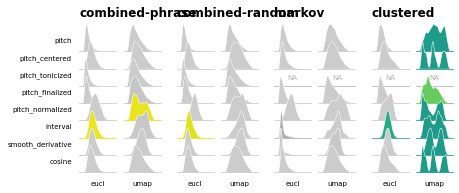

In [60]:
datasets = ['combined-phrase', 'combined-random', 'markov', 'clustered']
representations = [
    "pitch",
    "pitch_centered",
    "pitch_tonicized",
    "pitch_finalized",
    "pitch_normalized",
    "interval",
    "smooth_derivative",
    "cosine",
]
metrics = ['eucl', 'umap']

nrows = len(representations)
ncols = len(metrics)
fig = plt.figure(
    figsize=cm2inch(17, 7)
    # figsize=(len(datasets)*ncols*1.2, nrows*0.5)
)
gs = fig.add_gridspec(nrows=1, ncols=len(datasets))
for d, dataset in enumerate(datasets):
    axs = [fig.add_subplot(a) for a in gs[d].subgridspec(nrows, ncols)]
    axs = np.array(axs).reshape(nrows, ncols)
    title(dataset, ax=axs[0, 0])
    show_distance_distributions(
        dataset=dataset, 
        representations=representations,
        metrics=metrics,
        ylabels = d == 0, 
        axs=axs
    )

plt.savefig('../figures/fig-dist-dip-test-results/histograms-raw.pdf')

In [5]:
datasets = ['combined-phrase', 'combined-random', 'markov', 'clustered']
representations = [
    "pitch",
    "pitch_centered",
    "pitch_tonicized",
    "pitch_finalized",
    "pitch_normalized",
    "interval",
    "smooth_derivative",
    "cosine",
]
metrics = ['corr', 'umap']

nrows = len(representations)
ncols = len(metrics)
fig = plt.figure(
    figsize=cm2inch(17, 7)
    # figsize=(len(datasets)*ncols*1.2, nrows*0.5)
)
gs = fig.add_gridspec(nrows=1, ncols=len(datasets))
for d, dataset in enumerate(datasets):
    axs = [fig.add_subplot(a) for a in gs[d].subgridspec(nrows, ncols)]
    axs = np.array(axs).reshape(nrows, ncols)
    title(dataset, ax=axs[0, 0])
    show_distance_distributions(
        dataset=dataset, 
        representations=representations,
        metrics=metrics,
        ylabels = d == 0, 
        axs=axs
    )

plt.savefig('../figures/fig-dist-dip-test-results/histograms-corr-umap-raw.pdf')

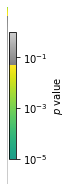

In [93]:
from src.visualize import get_pval_cmap

plt.subplots(figsize=cm2inch(4, 7), tight_layout=True)
cmap = get_pval_cmap(min_gray=0.2, vmin=1e-5)
norm = LogNorm(vmin=1e-5, vmax=1)
ps = np.linspace(1e-8, 1, 1000)[:, None]
plt.imshow(ps, cmap=cmap, norm=norm)
plt.colorbar(label='$p$ value')
plt.axis('off')
plt.savefig('../figures/fig-dist-dip-test-results/colorbar.pdf')